In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a href="https://www.kaggle.com/ronitf/heart-disease-uci">Heart DataSet</a>

In [ ]:
import matplotlib.pyplot as mplt
import numpy as np
import numpy.linalg as nplinalg
import pandas as pd
import seaborn as sns
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
print(f"Numpy version is {np.__version__}.")
print(f"Pandas version is {pd.__version__}.")
print(f"Seaborn version is {sns.__version__}.")
print(f"Sklearn version is {skl.__version__}.")

Numpy version is 1.19.2.
Pandas version is 1.2.3.
Seaborn version is 0.11.1.
Sklearn version is 0.24.1.


In [ ]:
dataset = "D:\Datasets\Heart_Disease_UCI\heart.csv"
heart_df = pd.read_csv(dataset,delimiter= ",")
x = heart_df.copy()
y = x.pop('restecg')

In [ ]:
print(f"The number of observations is {heart_df.shape[0]}, and the number of variables is {heart_df.shape[1]}")

The number of observations is 303, and the number of variables is 14


## Exploratory Analysis

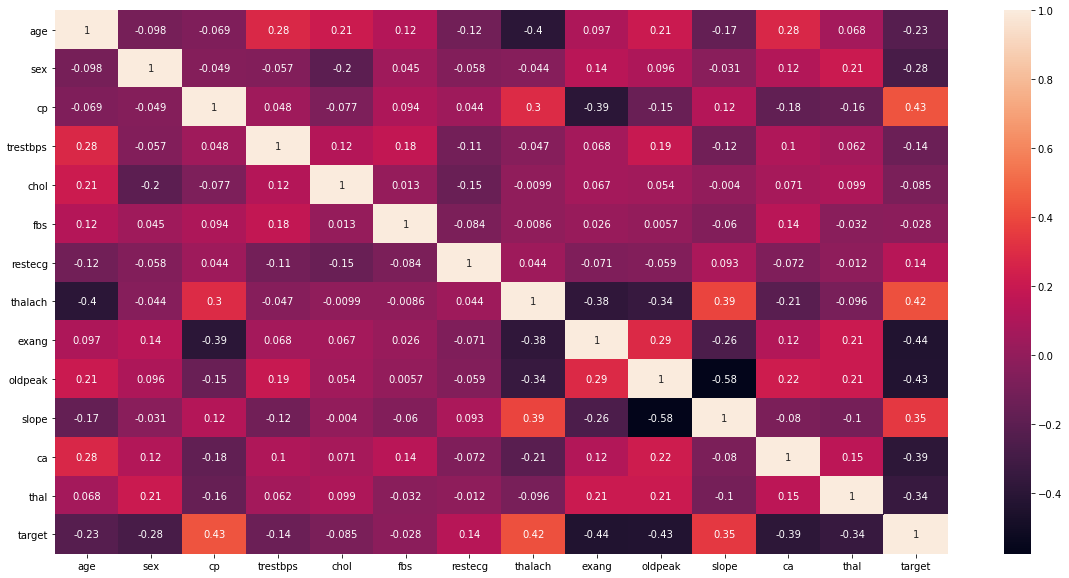

In [ ]:
heart_matrix = heart_df.corr()
mplt.figure(figsize= (20,10))
ax = sns.heatmap(heart_matrix, annot= True)
mplt.show()

In [ ]:
X_b = x.copy()
X_b.insert(0,'Ones',1)
X_b.head()

,Ones,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target
0,1,63,1,3,145,233,1,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,187,0,3.5,0,0,2,1
2,1,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,1,56,1,1,120,236,0,178,0,0.8,2,0,2,1
4,1,57,0,0,120,354,0,163,1,0.6,2,0,2,1


In [ ]:
Theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))
Theta

array([ 1.28974530e+00, -3.72677752e-03, -8.96972591e-02,  1.78914493e-03,
       -1.91462676e-03, -1.44986900e-03, -7.39303005e-02, -1.13750568e-03,
       -1.77405164e-02,  2.32014116e-02,  7.09841980e-02, -1.57580892e-03,
        4.99716260e-02,  1.07639135e-01])

In [ ]:
y_pred = X_b.dot(Theta)
y_pred

0      0.321606
1      0.530441
2      0.780444
3      0.586849
4      0.494628
         ...   
298    0.527738
299    0.542926
300    0.453410
301    0.647399
302    0.459463
Length: 303, dtype: float64

In [ ]:
MSE1 = mean_squared_error(np.squeeze(y_pred),y)
MSE1

0.2583764863261865

In [ ]:
RMSE1 = np.sqrt(MSE1)
RMSE1

0.5083074722313125

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(1.2897452979183195,
 array([-0.00372678, -0.08969726,  0.00178914, -0.00191463, -0.00144987,
        -0.0739303 , -0.00113751, -0.01774052,  0.02320141,  0.0709842 ,
        -0.00157581,  0.04997163,  0.10763914]))

In [ ]:
predict = lin_reg.predict(x)

In [ ]:
MSSE2 = np.sqrt(mean_squared_error(np.squeeze(lin_reg.predict(x)),y))
MSSE2

0.5083074722313125

In [ ]:
eta = 0.2  # learning rate
n_iterations = 10
m = X_b.shape[0]
np.random.seed(42)
theta = np.random.randn(X_b.shape[1])  # create random initialization for theta

for iteration in range(n_iterations):
    gradients = 2/m * np.transpose(X_b).dot(np.squeeze(X_b.dot(theta)) - np.squeeze(y))
    theta = theta - eta * gradients

In [ ]:
theta

Ones        3.025399e+42
age         1.651499e+44
sex         2.027765e+42
cp          2.928132e+42
trestbps    4.001819e+44
chol        7.650587e+44
fbs         4.556177e+41
thalach     4.547161e+44
exang       9.855246e+41
oldpeak     3.147732e+42
slope       4.249699e+42
ca          2.223166e+42
thal        7.019415e+42
target      1.645867e+42
dtype: float64

In [ ]:
M = np.array(X_b)

In [ ]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_scaled = x_scaler.fit_transform(M)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1,1))

In [ ]:
eta = 0.2  # learning rate
n_iterations = 10000
m = X_b.shape[0]
np.random.seed(42)
theta = np.random.randn(X_b.shape[1])  # create random initialization for theta

for iteration in range(n_iterations):
    gradients = 2/m * np.transpose(X_scaled).dot(np.squeeze(X_scaled.dot(theta)) - np.squeeze(y_scaled))
    theta = theta - eta * gradients

In [ ]:
theta

array([ 0.49671415,  0.04398073, -0.02025286,  0.00395835, -0.0706771 ,
       -0.25778431, -0.03890366,  0.08724815,  0.01883836,  0.1515889 ,
        0.11739467,  0.00192061,  0.17312705,  0.09112636])

In [ ]:
X_scaled[:5,:].dot(theta)

array([0.13666039, 0.26210926, 0.36784077, 0.33849218, 0.29285126])

In [ ]:
y_scaler.inverse_transform(X_scaled[:5,:].dot(theta).reshape(-1,1))

array([[0.27332077],
       [0.52421852],
       [0.73568154],
       [0.67698436],
       [0.58570252]])

In [ ]:
y_scaler.inverse_transform(X_scaled.dot(theta).reshape(-1,1))

array([[0.27332077],
       [0.52421852],
       [0.73568154],
       [0.67698436],
       [0.58570252],
       [0.40896612],
       [0.49630217],
       [0.69285053],
       [0.64813048],
       [0.75528409],
       [0.63606177],
       [0.56493759],
       [0.59640427],
       [0.66357771],
       [0.54176356],
       [0.62422885],
       [0.55426402],
       [0.48083818],
       [0.62247412],
       [0.73124426],
       [0.62290321],
       [0.66727778],
       [0.59467069],
       [0.43818164],
       [0.85225822],
       [0.57499664],
       [0.606705  ],
       [0.67255712],
       [0.39207685],
       [0.37902751],
       [0.70325505],
       [0.80552791],
       [0.63586997],
       [0.34260617],
       [0.69088417],
       [0.55016533],
       [0.48883507],
       [0.77788202],
       [0.61114301],
       [0.50135561],
       [0.58678161],
       [0.49432455],
       [0.69638311],
       [0.47948389],
       [0.48795479],
       [0.5275606 ],
       [0.59568375],
       [0.545

In [ ]:
y_pred = y_scaler.inverse_transform(X_scaled.dot(theta).reshape(-1,1))

In [ ]:
np.squeeze(y_pred) - y

0      0.273321
1     -0.475781
2      0.735682
3     -0.323016
4     -0.414297
         ...   
298   -0.565027
299   -0.583462
300   -0.467316
301   -0.423513
302    0.362852
Name: restecg, Length: 303, dtype: float64

In [ ]:
(np.squeeze(y_pred) - y)/y

0           inf
1     -0.475781
2           inf
3     -0.323016
4     -0.414297
         ...   
298   -0.565027
299   -0.583462
300   -0.467316
301   -0.423513
302         inf
Name: restecg, Length: 303, dtype: float64

In [ ]:
MSE2 = mean_squared_error(np.squeeze(y_pred),y)
MSE2

0.2663695975068618

In [ ]:
RMSE2 = np.sqrt(MSE2)
RMSE2

0.51611006336523

In [2]:
!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks (1)/HeartsUCI.ipynb" --to markdown  --output-dir markdown

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks (1)/HeartsUCI.ipynb to markdown
[NbConvertApp] Support files will be in HeartsUCI_files/
[NbConvertApp] Making directory markdown/HeartsUCI_files
[NbConvertApp] Writing 15523 bytes to markdown/HeartsUCI.md
